In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv')
df
#fips_df = pd.read_csv('state_and_county_fips_master.csv')
#fips_df

/var/folders/tr/lrj2g9jj48b3h_1g08xgzp8r0000gn/T/ipykernel_22215/1003764819.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv')


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-01,SC,45.0,GREENVILLE,45045.0,18 to 49 years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Missing,NaN
1,2021-01,DE,10.0,NEW CASTLE,10003.0,50 to 64 years,Female,Missing,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
2,2022-01,SC,45.0,RICHLAND,45079.0,18 to 49 years,Female,Black,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
3,2021-09,TN,47.0,MONTGOMERY,47125.0,0 - 17 years,Male,Black,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2022-09,NJ,34.0,WARREN,34041.0,0 - 17 years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100325975,2022-10,VA,51.0,ALEXANDRIA CITY,51510.0,0 - 17 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Missing,NaN
100325976,2020-12,CA,6.0,RIVERSIDE,6065.0,18 to 49 years,Female,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Missing,NaN
100325977,2020-10,MN,27.0,WASHINGTON,27163.0,50 to 64 years,Female,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,Yes
100325978,2020-09,NY,36.0,CHEMUNG,36015.0,18 to 49 years,Male,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN


In [5]:
# check data types of the original columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100325980 entries, 0 to 100325979
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       object 
 1   res_state                        object 
 2   state_fips_code                  float64
 3   res_county                       object 
 4   county_fips_code                 float64
 5   age_group                        object 
 6   sex                              object 
 7   race                             object 
 8   ethnicity                        object 
 9   case_positive_specimen_interval  float64
 10  case_onset_interval              float64
 11  process                          object 
 12  exposure_yn                      object 
 13  current_status                   object 
 14  symptom_status                   object 
 15  hosp_yn                          object 
 16  icu_yn                           object 
 17  deat

In [ ]:
df.describe()

In [6]:
# update the month, state fips codes, and county fips codes columns to more appropriate data types

df["case_month"] = pd.to_datetime(df["case_month"])
df[["state_fips_code", "county_fips_code"]] = df[["state_fips_code", "county_fips_code"]].fillna(0)
df[["state_fips_code", "county_fips_code"]] = df[["state_fips_code", "county_fips_code"]].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100325980 entries, 0 to 100325979
Data columns (total 19 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   case_month                       datetime64[ns]
 1   res_state                        object        
 2   state_fips_code                  int64         
 3   res_county                       object        
 4   county_fips_code                 int64         
 5   age_group                        object        
 6   sex                              object        
 7   race                             object        
 8   ethnicity                        object        
 9   case_positive_specimen_interval  float64       
 10  case_onset_interval              float64       
 11  process                          object        
 12  exposure_yn                      object        
 13  current_status                   object        
 14  symptom_status                

In [3]:
# grouping # of cases by month

df_by_month = df.groupby("case_month").count()
df_by_month = df_by_month.reset_index()
df_by_month.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-01,4156,4156,1874,1874,1065,659,167,167,1543,2347,4203,4203,4203,4203,4203,4203,3313,333
1,2020-02,4374,4374,2634,2634,1806,1392,465,208,2294,3269,4438,4438,4438,4438,4438,4438,3236,1114
2,2020-03,374576,374576,361836,361836,356144,344134,285966,275526,222276,238505,374605,374605,374605,374605,374605,374605,340293,66380
3,2020-04,811944,811944,781943,781943,790765,767438,636305,616648,441341,411390,811960,811960,811960,811960,811960,811960,753238,106219
4,2020-05,722535,722535,671491,671491,701545,673971,540344,516428,322175,347389,722563,722563,722563,722563,722563,722563,662255,68788


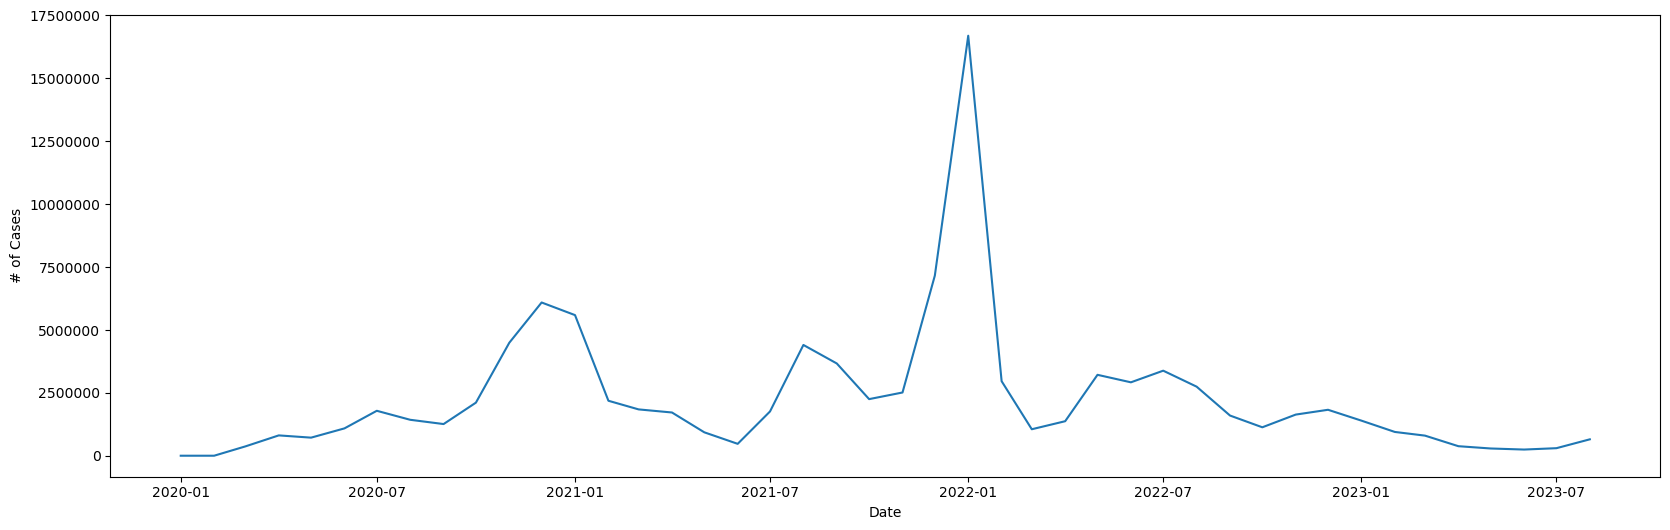

In [9]:
# plotting number of cases over time

import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.ticklabel_format(style='plain')
plt.plot(df_by_month['case_month'], df_by_month['res_state'])
plt.xlabel("Date")
plt.ylabel("# of Cases")
plt.show()

In [10]:
# grouping number of cases by sex

df_by_sex = df.groupby("sex").count()
df_by_sex = df_by_sex.reset_index()
df_by_sex.head()

,sex,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,Female,52020259,52020246,52020259,48702910,52020259,52020259,45297706,44291383,23494296,19756835,52020259,52020259,52020259,52020259,52020259,52020259,50659238,2117468
1,Male,44261901,44261884,44261901,41433380,44261901,44261901,38321433,37420086,19581872,16379727,44261901,44261901,44261901,44261901,44261901,44261901,42878367,1438930
2,Missing,420631,420631,420631,226528,420631,420631,393468,388052,47318,44753,420631,420631,420631,420631,420631,420631,411806,552
3,Other,1534,1534,1534,1157,1534,1534,876,664,862,1065,1534,1534,1534,1534,1534,1534,1307,79
4,Unknown,792918,792918,792918,719676,792918,792918,610691,585431,179901,207710,792918,792918,792918,792918,792918,792918,767915,5954


([<matplotlib.patches.Wedge at 0x7f988dc90e80>,
 [Text(-0.11574710809332973, 1.0938933252232739, 'Female'),
  Text(0.07284000840629669, -1.0975856837511004, 'Male'),
  Text(1.0976947176379859, -0.07117799427957178, 'Missing'),
  Text(1.0985613728532158, -0.056239755288033794, 'Other'),
  Text(1.0996409719427134, -0.028102185411188235, 'Unknown')],
 [Text(-0.0631347862327253, 0.596669086485422, '53.4%'),
  Text(0.03973091367616182, -0.598683100227873, '45.4%'),
  Text(0.5987425732570831, -0.03882436051613005, '0.4%'),
  Text(0.5992152942835722, -0.030676230157109338, '0.0%'),
  Text(0.5998041665142072, -0.015328464769739035, '0.8%')])

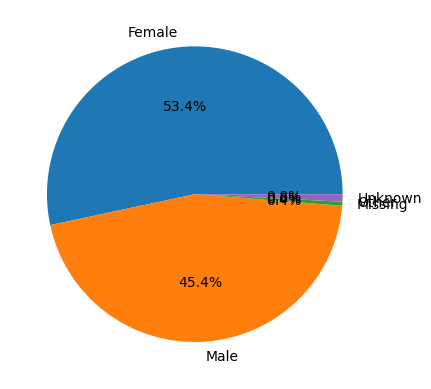

In [19]:
# charting number of cases by sex

labels = df_by_sex['sex']
sizes = df_by_sex['case_month']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [18]:
# grouping number of cases by age group

df_by_age = df[["sex", "age_group"]].groupby("age_group").count()
df_by_age = df_by_age.reset_index()
df_by_age.head()

,age_group,sex
0,0 - 17 years,16318587
1,18 to 49 years,49357409
2,50 to 64 years,17865888
3,65+ years,13029407
4,Missing,925952


([<matplotlib.patches.Wedge at 0x7f988dced630>,
 [Text(0.9514019357193036, 0.5521180641036499, '0 - 17 years'),
  Text(-0.9655871824087889, 0.5269168750076774, '18 to 49 years'),
  Text(0.1051807196681269, -1.0949598240164318, '50 to 64 years'),
  Text(0.9759424376308677, -0.5074804020167872, '65+ years'),
  Text(1.0995104093099812, -0.03281554233892176, 'Missing')],
 [Text(0.5189465103923474, 0.30115530769289994, '16.7%'),
  Text(-0.5266839176775212, 0.2874092045496422, '50.6%'),
  Text(0.05737130163716012, -0.5972508130998718, '18.3%'),
  Text(0.5323322387077459, -0.27680749200915666, '13.4%'),
  Text(0.599732950532717, -0.017899386730320956, '0.9%')])

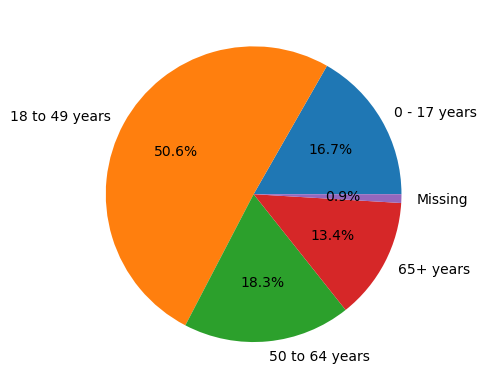

In [20]:
# charting number of cases by age

labels = df_by_age['age_group']
sizes = df_by_age['sex']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [11]:
# grouping number of cases by race

df_by_race = df.groupby("race").count()
df_by_race = df_by_race.reset_index()
df_by_race.head()

,race,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,American Indian/Alaska Native,563476,563476,563476,462615,563476,563476,563476,502606,131016,188969,563476,563476,563476,563476,563476,563476,517849,11837
1,Asian,3170530,3170530,3170530,3020709,3170530,3170530,3170530,3081054,1274450,1110249,3170530,3170530,3170530,3170530,3170530,3170530,3078802,89632
2,Black,9709849,9709849,9709849,9253046,9709849,9709849,9709849,9473191,4969120,3456807,9709849,9709849,9709849,9709849,9709849,9709849,9347155,505141
3,Missing,7723702,7723702,7723702,6792688,7723702,7723702,7723702,7491081,2211727,2350536,7723702,7723702,7723702,7723702,7723702,7723702,7662450,30552
4,Multiple/Other,1518868,1518868,1518868,1180431,1518868,1518868,1518868,1332716,428582,433930,1518868,1518868,1518868,1518868,1518868,1518868,1434611,31923


([<matplotlib.patches.Wedge at 0x7f9ed107ca00>,
 [Text(1.0997593374434866, 0.023008687617144426, 'American Indian/Alaska Native'),
  Text(1.0860305179816143, 0.17475043351187142, 'Asian'),
  Text(0.8838061201438014, 0.654894451034944, 'Black'),
  Text(0.31020235482476, 1.0553551530462026, 'Missing'),
  Text(-0.06293113891118356, 1.0981983754109919, 'Multiple/Other'),
  Text(-0.12841258392877625, 1.0924789280753817, 'Native Hawaiian/Other Pacific Islander'),
  Text(-0.6255977106458062, 0.9047803625381833, 'Unknown'),
  Text(-0.26215075937312377, -1.0683056582084056, 'White')],
 [Text(0.599868729514629, 0.01255019324571514, '0.7%'),
  Text(0.5923802825354259, 0.09531841827920258, '3.7%'),
  Text(0.48207606553298255, 0.35721515510996943, '11.5%'),
  Text(0.16920128444986907, 0.5756482652979287, '9.1%'),
  Text(-0.03432607576973648, 0.5990172956787227, '1.8%'),
  Text(-0.0700432275975143, 0.5958975971320264, '0.1%'),
  Text(-0.3412351148977124, 0.49351656138446354, '15.4%'),
  Text(-0.1429

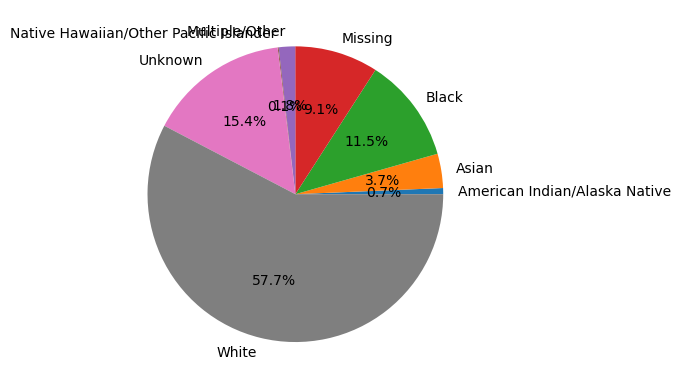

In [13]:
# charting number of cases by race

labels = df_by_race['race']
sizes = df_by_race['case_month']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [3]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 16.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# attempting SweetViz Profiling

import sweetviz as sv

sweetviz_report = sv.analyze(df)

sweetviz_report.show_html('sweetviz_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
